In [ ]:
import tensorflow as tf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
dataset_zip_path = "/content/drive/MyDrive/brain_tumor_256_dataset.zip"  # Apne dataset ka path yahan change karein


In [ ]:
import zipfile
import os

# Unzip the dataset
zip_ref = zipfile.ZipFile(dataset_zip_path, 'r')
zip_ref.extractall("/content/dataset")
zip_ref.close()

# Dataset ka extracted path
dataset_path = "/content/dataset"


In [ ]:
print(os.listdir(dataset_path))  # Check extracted files


['Data']


In [ ]:
import os

# Check correct path
for root, dirs, files in os.walk("/content/dataset"):
    print(root)

# Update dataset path accordingly
dataset_path = "/content/dataset/brain_tumor_dataset"  # Check and change this if needed


/content/dataset
/content/dataset/Data
/content/dataset/Data/normal
/content/dataset/Data/glioma_tumor
/content/dataset/Data/pituitary_tumor
/content/dataset/Data/meningioma_tumor


In [ ]:
import os
import shutil
import random

# Old dataset path
old_data_path = "/content/dataset/Data"  # Yeh aapke dataset ka asli path hai

# New dataset paths
new_dataset_path = "/content/dataset"
train_path = os.path.join(new_dataset_path, "train")
test_path = os.path.join(new_dataset_path, "test")

# Create train & test folders
os.makedirs(train_path, exist_ok=True)
os.makedirs(test_path, exist_ok=True)

# Split data into train and test
split_ratio = 0.8  # 80% train, 20% test

for category in os.listdir(old_data_path):
    category_path = os.path.join(old_data_path, category)
    if os.path.isdir(category_path):
        images = os.listdir(category_path)
        random.shuffle(images)

        train_size = int(len(images) * split_ratio)
        train_images = images[:train_size]
        test_images = images[train_size:]

        # Create category folders in train & test
        os.makedirs(os.path.join(train_path, category), exist_ok=True)
        os.makedirs(os.path.join(test_path, category), exist_ok=True)

        # Move images
        for img in train_images:
            shutil.move(os.path.join(category_path, img), os.path.join(train_path, category, img))

        for img in test_images:
            shutil.move(os.path.join(category_path, img), os.path.join(test_path, category, img))

print("Dataset successfully split into Train & Test!")


Dataset successfully split into Train & Test!


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Image parameters
img_size = (256, 256)
batch_size = 32

# Data Augmentation
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_data = datagen.flow_from_directory(
    train_path,  # Now train_path is correct!
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset="training"
)

val_data = datagen.flow_from_directory(
    train_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset="validation"
)


Found 1980 images belonging to 4 classes.
Found 495 images belonging to 4 classes.


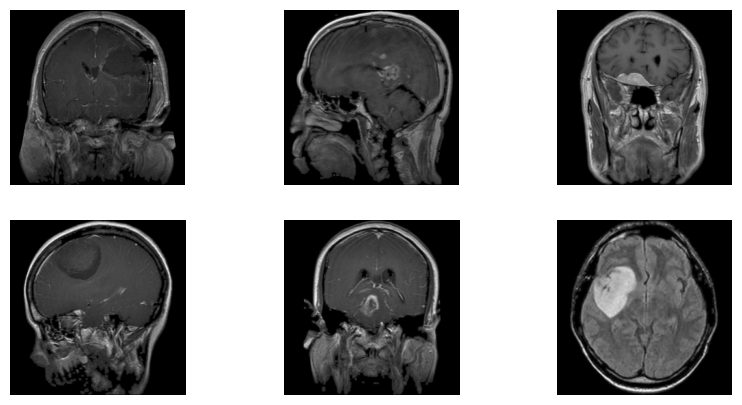

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sample batch from train_data
x_batch, y_batch = next(train_data)

# Show some sample images
plt.figure(figsize=(10, 5))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(x_batch[i])
    plt.axis('off')
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# CNN Model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')  # 4 classes: glioma, meningioma, pituitary, normal
])

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,839,492 (56.61 MB)

 Trainable params: 14,839,492 (56.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train Model
history = model.fit(train_data, validation_data=val_data, epochs=10)


Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


62/62 ━━━━━━━━━━━━━━━━━━━━ 332s 5s/step - accuracy: 0.3099 - loss: 1.6176 - val_accuracy: 0.4404 - val_loss: 1.2242
Epoch 2/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 326s 5s/step - accuracy: 0.5613 - loss: 1.0490 - val_accuracy: 0.5859 - val_loss: 0.9743
Epoch 3/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 311s 5s/step - accuracy: 0.7101 - loss: 0.7611 - val_accuracy: 0.6081 - val_loss: 0.9134
Epoch 4/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 323s 5s/step - accuracy: 0.7713 - loss: 0.5786 - val_accuracy: 0.6606 - val_loss: 0.8172
Epoch 5/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 309s 5s/step - accuracy: 0.8434 - loss: 0.4067 - val_accuracy: 0.7192 - val_loss: 0.8071
Epoch 6/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 322s 5s/step - accuracy: 0.8961 - loss: 0.2930 - val_accuracy: 0.7232 - val_loss: 0.8542
Epoch 7/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 310s 5s/step - accuracy: 0.9042 - loss: 0.2565 - val_accuracy: 0.7333 - val_loss: 0.8281
Epoch 8/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 340s 6s/step - accuracy: 0.9445 - loss: 0.1609 - val_accuracy: 0.7394 - val_loss: 1.

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    "/content/dataset/test",
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Evaluate model
test_loss, test_acc = model.evaluate(test_data)
print(f" Test Accuracy: {test_acc:.2f}")


Found 621 images belonging to 4 classes.
20/20 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.7250 - loss: 1.2212
 Test Accuracy: 0.78


In [ ]:
model.save("brain_tumor_model.h5")
print(" Model saved as 'brain_tumor_model.h5'")


 Model saved as 'brain_tumor_model.h5'


In [ ]:
from tensorflow.keras.models import load_model

model = load_model("brain_tumor_model.h5")
print(" Model loaded successfully!")


 Model loaded successfully!


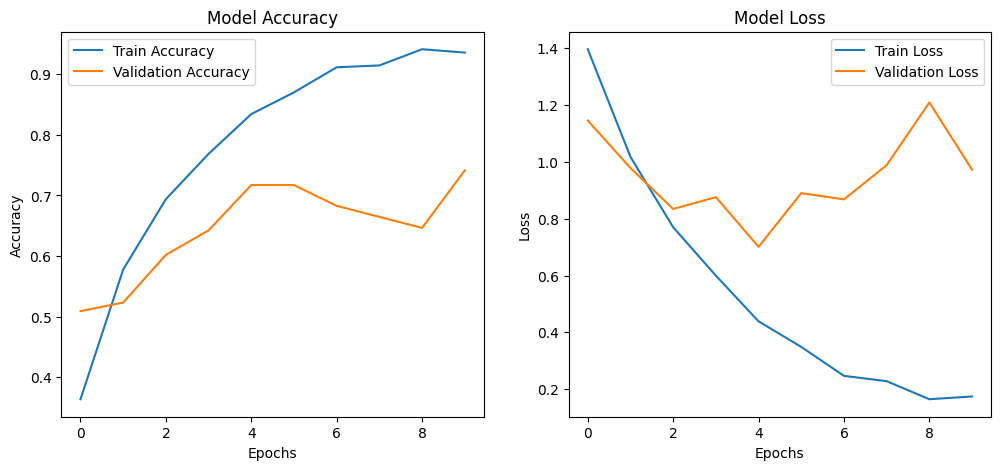

In [ ]:
import matplotlib.pyplot as plt

# Plot Accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Model Accuracy")

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Model Loss")

plt.show()


In [ ]:
from google.colab import files

uploaded = files.upload()


Saving MRI2.jpg to MRI2.jpg


In [ ]:
import cv2
import numpy as np
from tensorflow.keras.preprocessing import image

# Load image
img_path = list(uploaded.keys())[0]  # Get uploaded file name
img = image.load_img(img_path, target_size=(256, 256))

# Convert image to array
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions for model input
img_array /= 255.0  # Normalize

# Predict using model
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)

# Class labels (same order as train folders)
class_labels = ["glioma_tumor", "meningioma_tumor", "normal", "pituitary_tumor"]

print(f" Model Prediction: {class_labels[predicted_class[0]]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
 Model Prediction: meningioma_tumor
